# lock_time decoding

Isthmus Apr 2020

Attempting to decode [weird lock times](https://twitter.com/Mitchellpkt0/status/1245769473476485126)

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import binascii

## Import lock times

In [2]:
df = pd.read_csv('zcash_locktimes.csv')

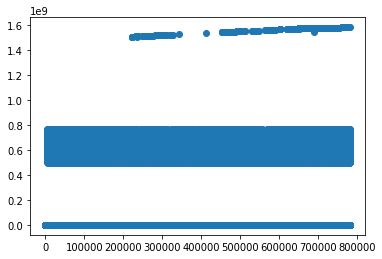

In [3]:
plt.scatter(df['block_number'], df['lock_time'])

### Trim down to area of interest (500M - 770M)

In [4]:
df = pd.read_csv('zcash_locktimes.csv')
df = df[df['lock_time']>500000000]
df = df[df['lock_time']<770000000]

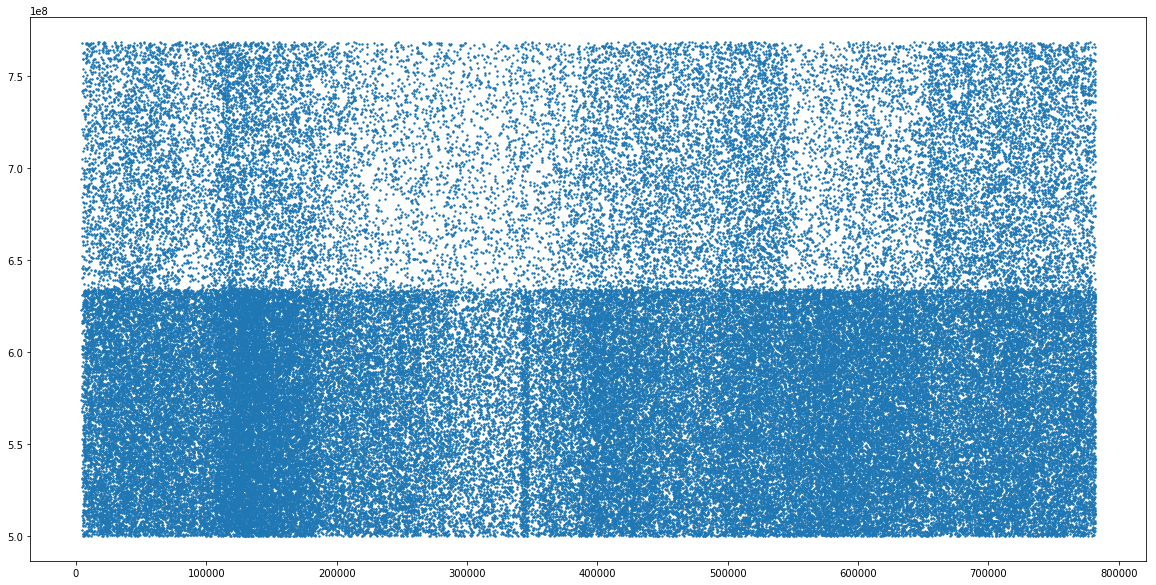

In [5]:
fig1 = plt.figure(figsize=(20,10), facecolor='white')
plt.scatter(df['block_number'], df['lock_time'], s=2)

## Data processing

Subtract 500 million offset

In [6]:
df['removed_offset'] = df['lock_time'] - 50000000
df.head()

,block_number,lock_time,removed_offset
47,782124,514300128,464300128
119,782107,504418912,454418912
171,782094,765454848,715454848
174,782092,630196800,580196800
179,782091,629364352,579364352


Make some speculative transformations

In [7]:
trimbinlist = []
flipbinlist = []
flipintlist = []
asasciilist = []
flipasciilist = []

for r in range(len(df)):
    
    #grab value
    intval = df.iloc[r].lock_time
    
    # convert to binary
    rawbin = bin(intval)
    trimbin = rawbin[2::]
    trimbinlist.append(trimbin)
    
    # convert bin to ascii
    asascii = binascii.b2a_uu(trimbin.encode())
    asasciilist.append(asascii)
    
    # crash if too small
    if len(trimbin) < 29:
        crash('EDGE CASE - NEED TO PAD')
        
    # flip the binary
    flipbin = trimbin[::-1]
    flipbinlist.append(flipbin)
    
    # convert reversed string to ascii
    flipascii = binascii.b2a_uu(flipbin.encode())
    flipasciilist.append(flipascii)
    
    # conert back to integer
    flipint = int(flipbin,2)
    flipintlist.append(flipint)
    
    
df['as_ascii'] = asasciilist
df['binary_string'] = trimbinlist
df['binary_string_flipped'] = flipbinlist
df['flipped_ascii'] = flipasciilist
df['flipped_int'] = flipintlist

In [8]:
df.head()

,block_number,lock_time,removed_offset,as_ascii,binary_string,binary_string_flipped,flipped_ascii,flipped_int
47,782124,514300128,464300128,"b'=,3$Q,3 Q,#$P,#$Q,3$P,#$Q,# P,3$Q,# P,# \n'",11110101001111001100011100000,00000111000110011110010101111,"b'=,# P,# Q,3$P,# Q,3 P,3$Q,3 P,3 Q,#$Q,3$ \n'",14892207
119,782107,504418912,454418912,"b'=,3$Q,3 P,# Q,# P,#$Q,#$P,#$P,#$Q,# P,# \n'",11110000100001101001001100000,00000110010010110000100001111,"b'=,# P,# Q,3 P,3 P,3 Q,3 P,# Q,# P,#$Q,3$ \n'",13197583
171,782094,765454848,715454848,"b'>,3 Q,3 Q,3 P,3$Q,3$Q,3$P,3 Q,# P,# P,# P\n'",101101100111111110101000000000,000000000101011111111001101101,"b'>,# P,# P,# P,3 Q,#$Q,3$Q,3$Q,# Q,3 Q,3 Q\n'",1441389
174,782092,630196800,580196800,"b'>,3 P,3 Q,3 P,3 P,# P,# P,3 Q,# Q,# P,# P\n'",100101100100000000101001000000,000000100101000000001001101001,"b'>,# P,# P,3 P,3 Q,# P,# P,# Q,# Q,3 Q,# Q\n'",9699945
179,782091,629364352,579364352,"b'>,3 P,3 Q,3 P,# P,3$P,3 Q,#$Q,#$P,# P,# P\n'",100101100000110101011010000000,000000010110101011000001101001,"b'>,# P,# P,#$P,3$P,3 Q,#$Q,# P,# Q,3 Q,# Q\n'",5943401


## Explore

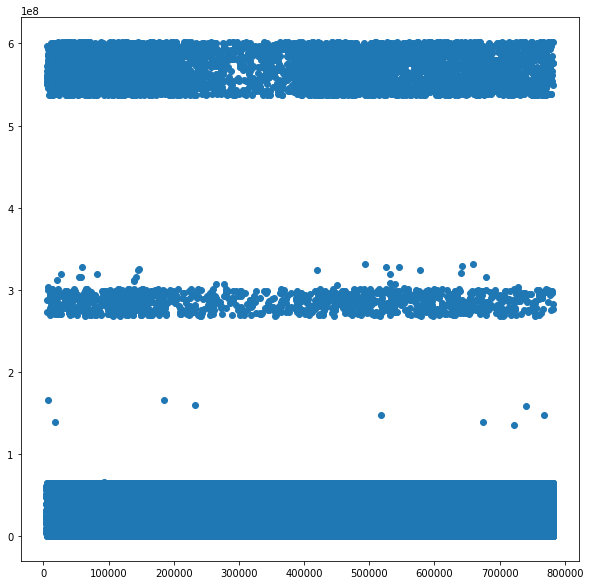

In [9]:
fig = plt.figure(figsize = (10,10), facecolor='w')
plt.scatter(df['block_number'], df['flipped_int'])

### ^ That makes no sense, must be wrong decoding

## Record 

In [10]:
df.to_csv('test.csv')